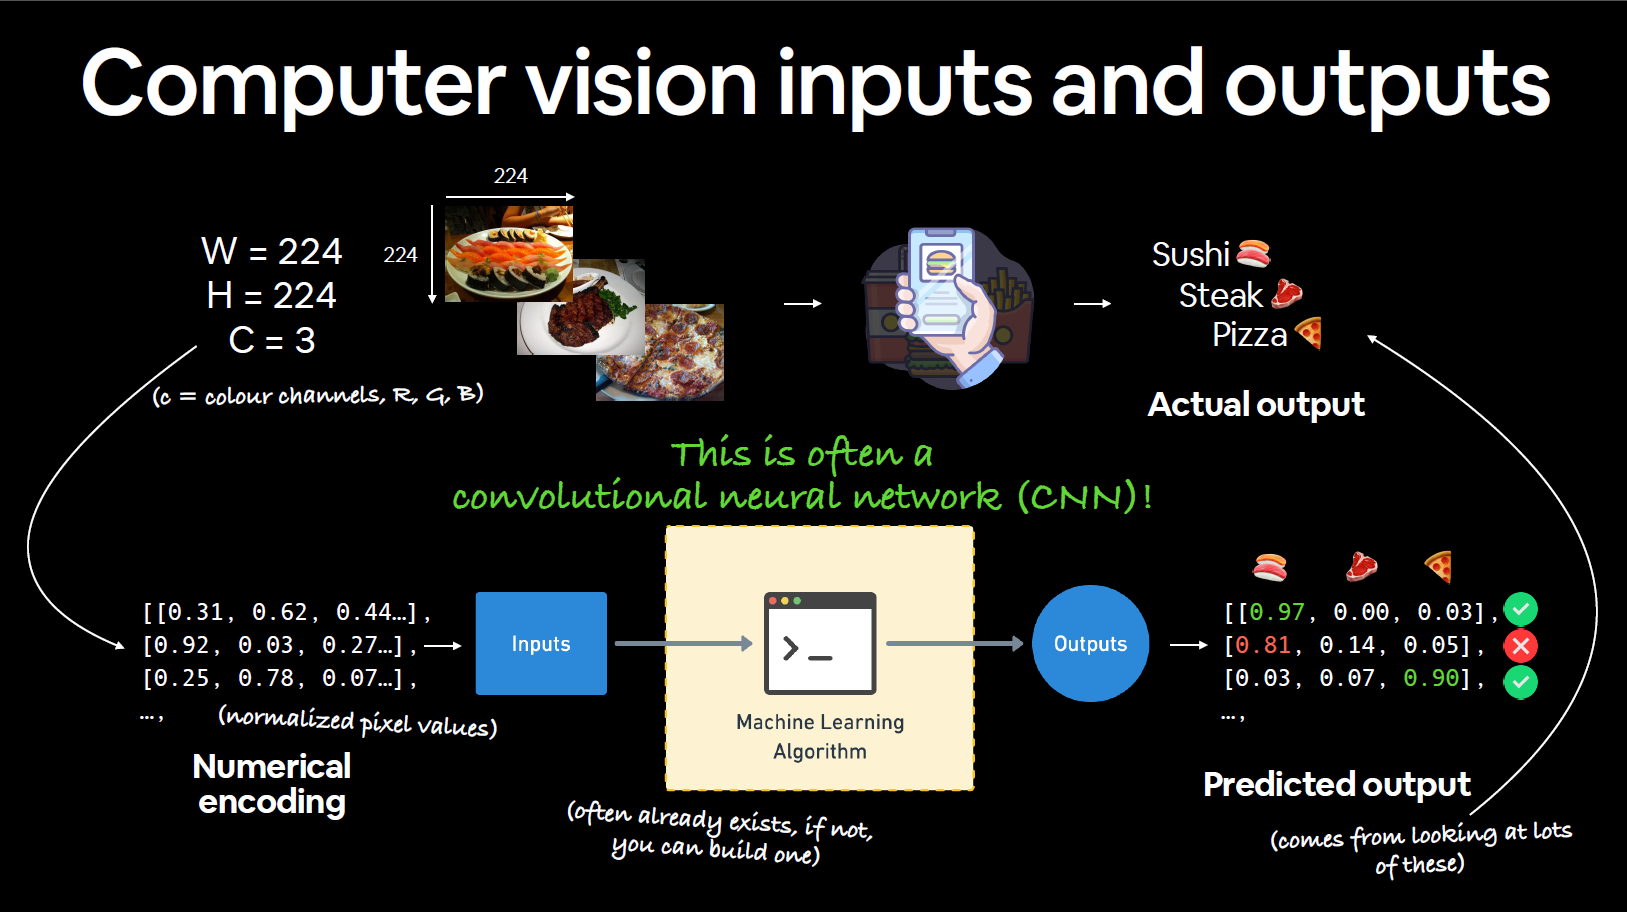

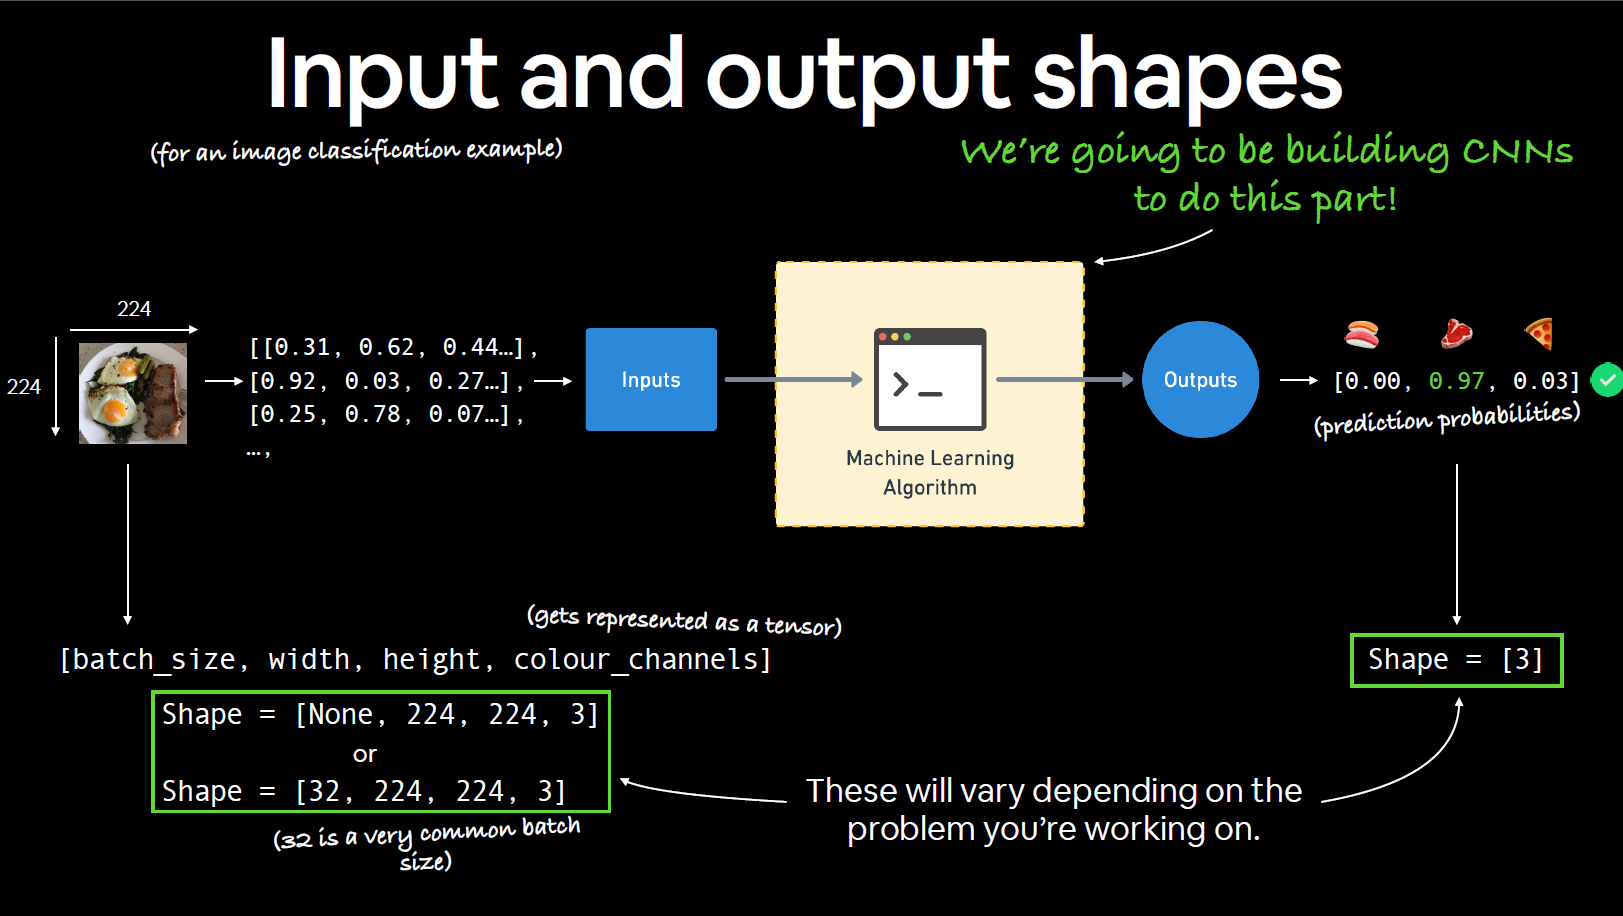

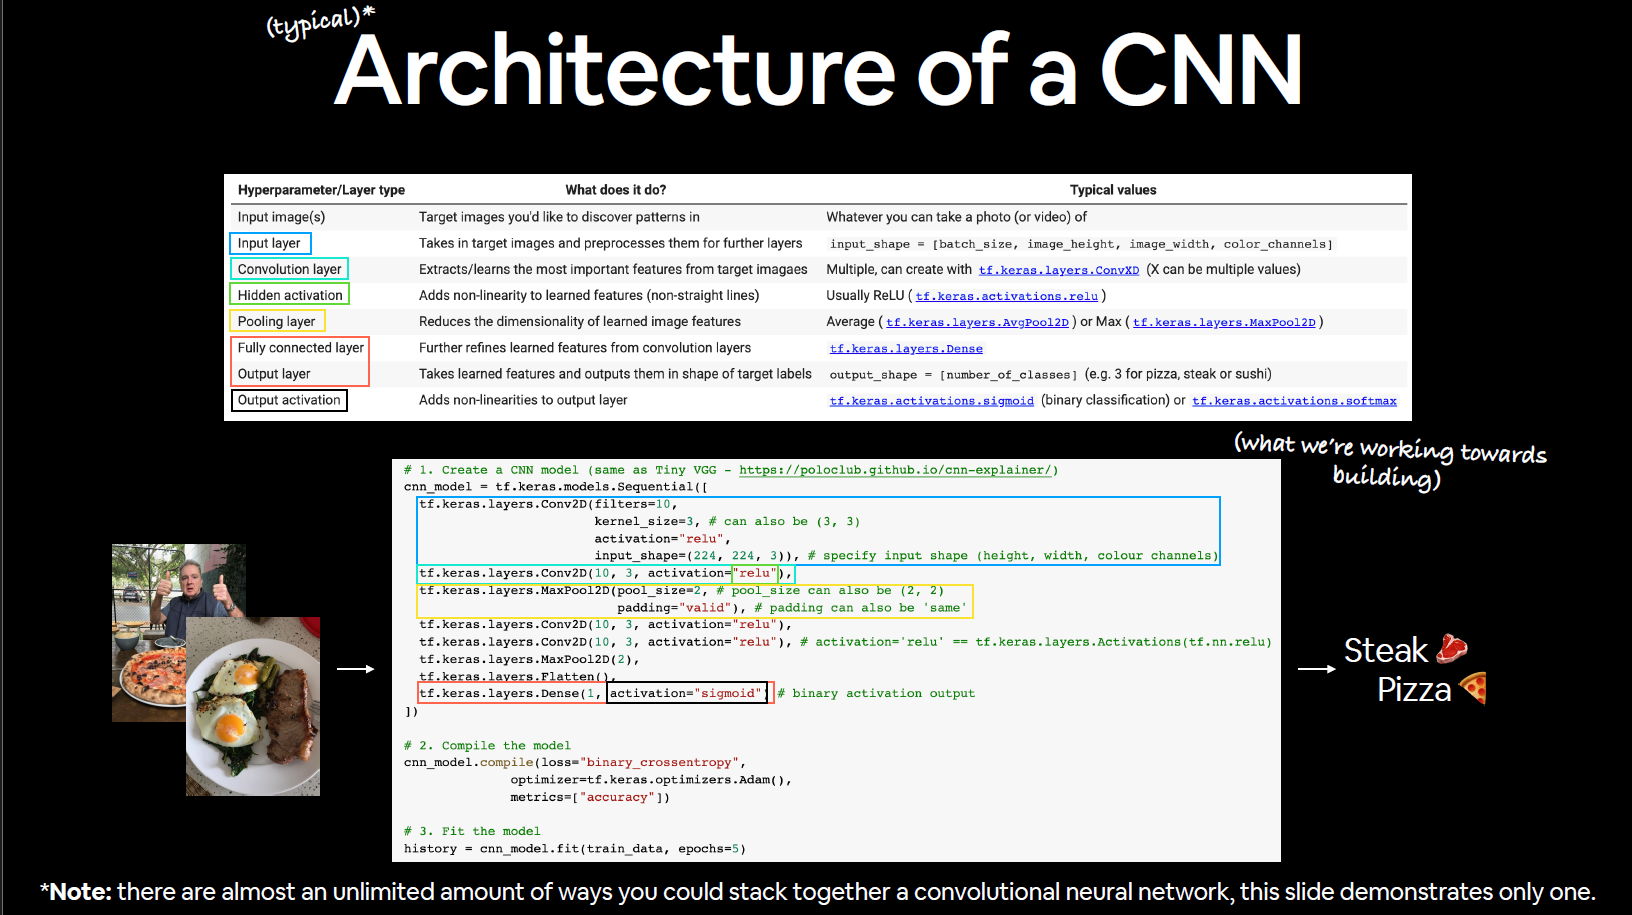

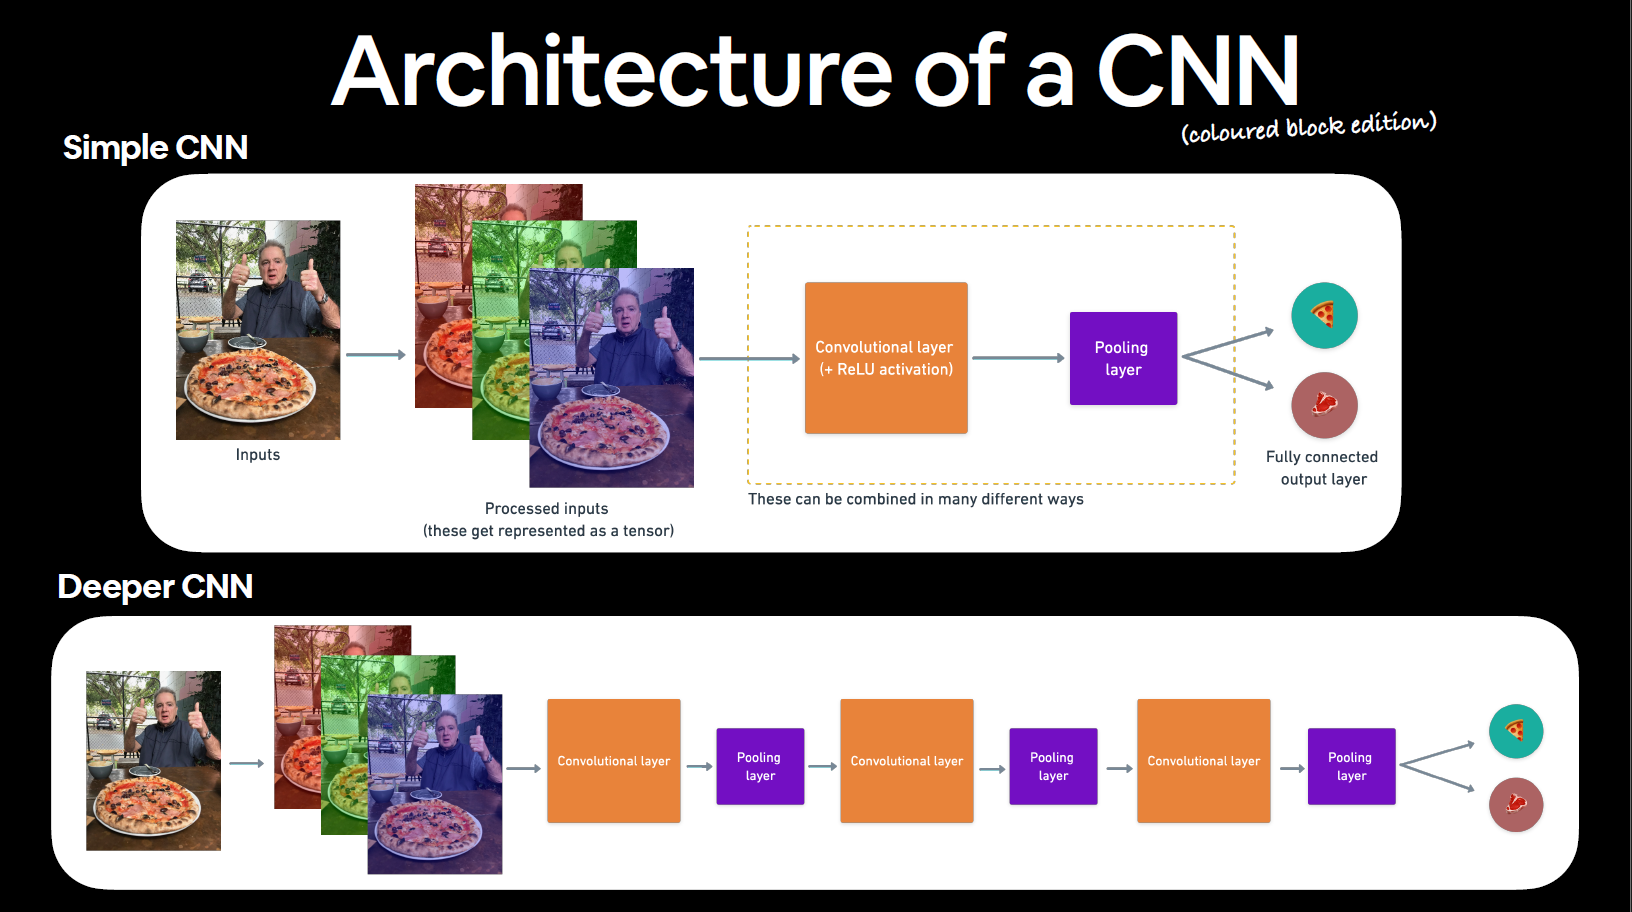

# Get the Data
The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-18 16:07:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.9MB/s    in 6.0s    

2024-07-18 16:08:01 (17.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [5]:
import os

# walk throught the pizza_steak direactory and list the number of iles
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .


In [6]:
# Another way to find the number of images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # read the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


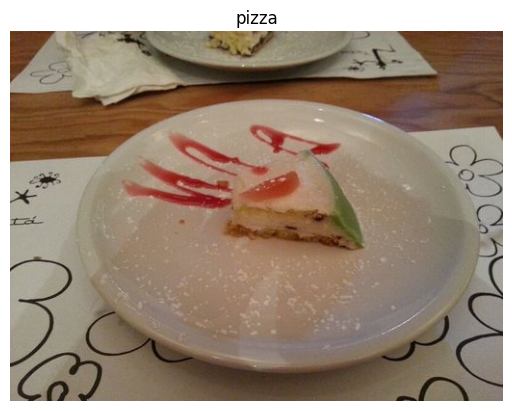

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class="pizza")

In [10]:
# view the image shape
img.shape   # returns width, height and color chanels

(384, 512, 3)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

You'll notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [11]:
# Get all the pixel values between 0 and 1 (Scaling)
img/255

array([[[0.4       , 0.25490196, 0.14901961],
        [0.4       , 0.25490196, 0.14117647],
        [0.4       , 0.25490196, 0.14117647],
        ...,
        [0.35686275, 0.21960784, 0.13333333],
        [0.35294118, 0.21568627, 0.12941176],
        [0.36078431, 0.22352941, 0.1372549 ]],

       [[0.38039216, 0.23529412, 0.12941176],
        [0.38039216, 0.23529412, 0.12156863],
        [0.38039216, 0.23921569, 0.11372549],
        ...,
        [0.35294118, 0.21568627, 0.12941176],
        [0.34901961, 0.21176471, 0.13333333],
        [0.35294118, 0.21568627, 0.12941176]],

       [[0.37254902, 0.22745098, 0.11372549],
        [0.37254902, 0.23137255, 0.10588235],
        [0.37254902, 0.23137255, 0.10588235],
        ...,
        [0.34509804, 0.21960784, 0.1372549 ],
        [0.34509804, 0.21568627, 0.14117647],
        [0.35294118, 0.22745098, 0.14509804]],

       ...,

       [[0.59607843, 0.54901961, 0.4627451 ],
        [0.6       , 0.55294118, 0.46666667],
        [0.6       , 0

## End-to-End Example
Let's build a convolutional neural network to find the patterns in our images. We need to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our data
* Compile our CNN
* Fit the CNN to our training data


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# set tht seed
tf.random.set_seed(42)


# pre-process data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


# setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process in a time
                                               target_size=(224, 224),  # convert all images to be 224*224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# create a CNN model (Same as Tiny VGG on the CNN Explainer Website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3,3)
                           activation="relu",
                           input_shape=(224, 224, 3)), # first layer specifies input shape(height, width, colo chanels)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,  # pool size can be (2,2)
                              padding="valid"),  # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation="relu" == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation on the output layer
])


# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 128ms/step - loss: 0.6023 - accuracy: 0.6620 - val_loss: 0.4438 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4591 - accuracy: 0.7893 - val_loss: 0.4042 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.4099 - accuracy: 0.8253 - val_loss: 0.4067 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.3460 - accuracy: 0.8527 - val_loss: 0.3171 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 5s 102ms/step - loss: 0.3335 - accuracy: 0.8600 - val_loss: 0.3467 - val_accuracy: 0.8440


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

In [13]:
# check the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Trying a non-CNN model on our images data

In [14]:
# set the random seed
tf.random.set_seed(42)

# create a model to replicate the Tensorflow Playground Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 102ms/step - loss: 1.2556 - accuracy: 0.5087 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 100ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN model, model_2 performs terribly.

### Try and Improve Model_2

In [16]:
# set the random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_3 = model_3.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 103ms/step - loss: 1.7313 - accuracy: 0.6553 - val_loss: 0.7373 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6789 - accuracy: 0.7233 - val_loss: 0.5317 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 5s 102ms/step - loss: 0.6219 - accuracy: 0.7367 - val_loss: 0.6336 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.7037 - accuracy: 0.7220 - val_loss: 1.3060 - val_accuracy: 0.5280
Epoch 5/5
47/47 [==============================] - 5s 102ms/step - loss: 0.9244 - accuracy: 0.6980 - val_loss: 0.7669 - val_accuracy: 0.7080


In [17]:
# look at the model_3 summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


our model is learning again. It got ~70% accuracy on the training set and ~70% accuracy on the validation set. So, this model has almost 550 times the parameters as our CNN but still underperforms. This is the power of CNN for Computer Vision.

We can think of trainable parameters as **patterns a model can learn from data**. Intuitively, we might think that the more the number of these params the better, and in lots of cases this is true. But in our case, the difference here is the two different style of model we're using.
Whereas a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a CNN neural network seeks to sort out and learn the most important patterns in an image**. So, even though there are lesser number of learnable params in CNN, these are often more helpful in deciphering between features in an image.

# Binary Classification: Let's Break it down
- become one with the data
- pre process the data (prepare it for our model - mainly scaling/normalization)
- created a model (start with a baseline)
- Fit the model
- Evaluate the model
- Adjust different params and improve the model
- Repeat until satisfied

## 1. Becoming one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


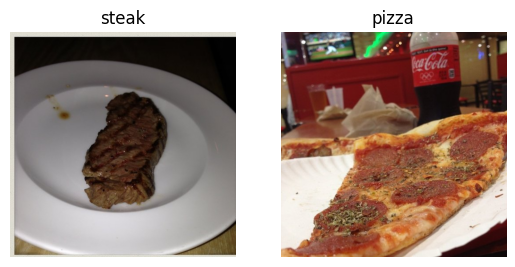

In [18]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Image Data Pre-Processing

In [19]:
!nvidia-smi

Thu Jul 18 16:09:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   57C    P0              30W /  72W |   1243MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets (Another option here might be to create a validation set).

For an image classification project, it's standard to have our data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [20]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
- 10,000 images (or more) might not fit into the memory of your processor (GPU).
- Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

[A batch size of 32 is good for your health](https://arxiv.org/abs/1804.07612).

There are many different batch sizes we could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [21]:
# Create Train and Test data Generators and Rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Loading in our image data from Directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory= train_dir, # target size of images
                                              target_size=(224, 224),  # target size of images (height and width)
                                              class_mode="binary",  # type of data you're working with
                                              batch_size=32)  # size of mini batches to load the data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode = "binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


 Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

- Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
- The target_size parameter defines the input size of our images in (height, width) format.
- The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
- The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.
We can take a look at our batched images and labels by inspecting the train_data object.

In [23]:
# get a sample of training data batch
images, labels = train_data.next()  # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [24]:
# how many batches
len(train_data)

47

In [25]:
# why do we have 47 batches
1500/32

46.875

In [26]:
# Get the first two images
images[:1], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
# view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

## 3. Create a model (start with a baseline)
A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

🔑 In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the Model (A 3 layer CNN)
model_4= Sequential([
    Conv2D(filters=10, # number of sliding windows, going across an input(higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window going across an input
           padding="valid",  # if "same", output shape is the same as input shape, if "valid" output shape gets compressed
           activation="relu",
           input_shape= (224,224, 3)), # specify the input layer shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (since we are working with binary classification, we use only 1 neuron)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
Let's discuss some of the components of the Conv2D layer:

- The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
- filters - these are the number of "feature extractors" that will be moving over our images.
- kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
- stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
- padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.
- What's a **"feature"**?
A feature can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these features are not defined by us, instead, the model learns them as it applies different filters across the image.



📖 Resources: For a great demonstration of these in action, be sure to spend some time going through the following:
- [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
- [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
- For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t/39371113#39371113).

In [31]:
# Compile the Model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [32]:
# Get the model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Fit the model

- steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
- validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [33]:
# check the length of training and testing dataset
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 0.5916 - accuracy: 0.6980 - val_loss: 0.3897 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 5s 102ms/step - loss: 0.4386 - accuracy: 0.8080 - val_loss: 0.4040 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.3131 - accuracy: 0.8953 - val_loss: 0.3631 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 5s 102ms/step - loss: 0.1690 - accuracy: 0.9513 - val_loss: 0.3262 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 5s 102ms/step - loss: 0.0849 - accuracy: 0.9733 - val_loss: 0.4487 - val_accuracy: 0.8260


## 5. Evaluate Our Model

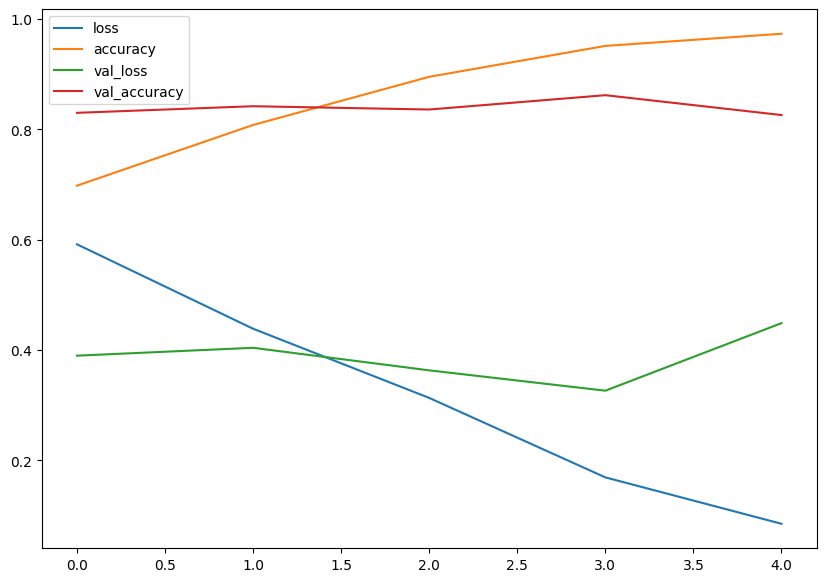

In [35]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [36]:
# Plot the validation and Training Data Separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.figure()
    plt.figure(figsize=(10,7))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.plot()


    # Plot accuracy
    plt.figure()
    plt.figure(figsize=(10,7))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.plot();

<Figure size 640x480 with 0 Axes>

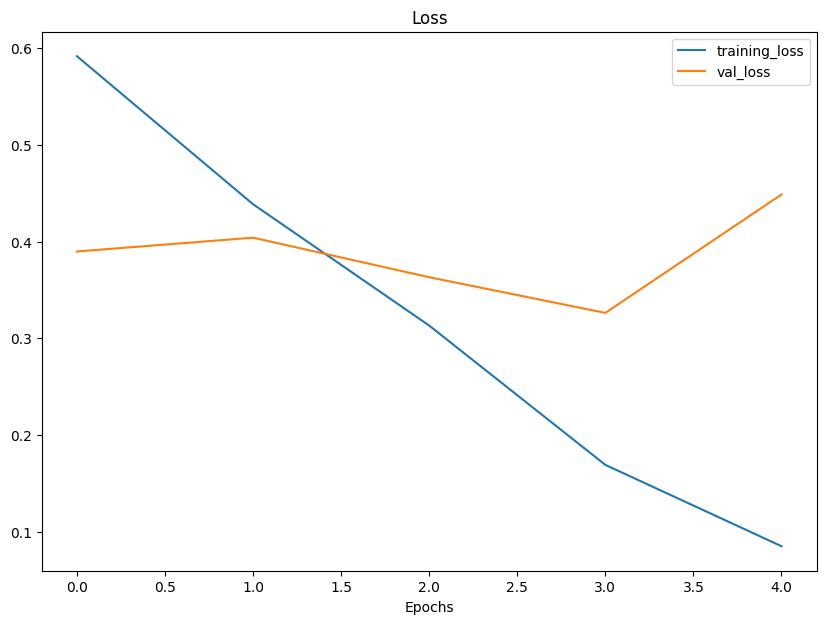

<Figure size 640x480 with 0 Axes>

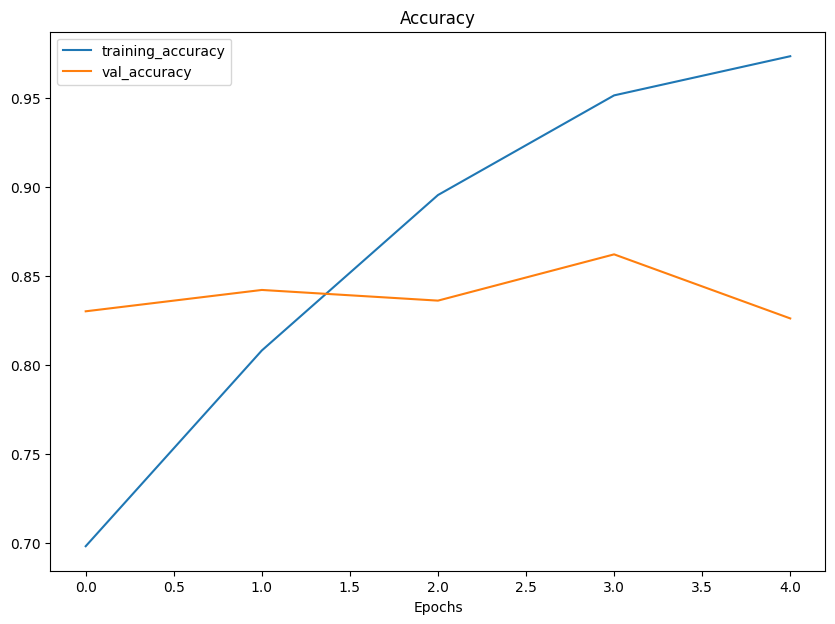

In [37]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

 judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's **validation loss starts to increase**, it's likely that it's **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [38]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6. Adjust the Model Parameters

Fitting a machine learning model comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

- Increase the number of convolutional layers.
- Increase the number of convolutional filters.
- Add another dense layer to the output of our flattened layer.
- Use Transfer Learning


Reduce Overfitting:
- Add data augmentation
- Add Regularization layers (such as MaxPool2D)
- Train on more data for higher epochs

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
- A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
- A ConvNet with max pooling and data augmentation
For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.

In [39]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

If convolutional layers learn the features of an image you can think of a **Max Pooling layer as figuring out the most important of those features**.

In [40]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

In [41]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 104ms/step - loss: 0.6027 - accuracy: 0.6627 - val_loss: 0.4706 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4589 - accuracy: 0.7933 - val_loss: 0.3806 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.4179 - accuracy: 0.8147 - val_loss: 0.3515 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 5s 103ms/step - loss: 0.4196 - accuracy: 0.8253 - val_loss: 0.3984 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 5s 102ms/step - loss: 0.3754 - accuracy: 0.8367 - val_loss: 0.3512 - val_accuracy: 0.8440


In [42]:
# Look at model summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

Notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

<Figure size 640x480 with 0 Axes>

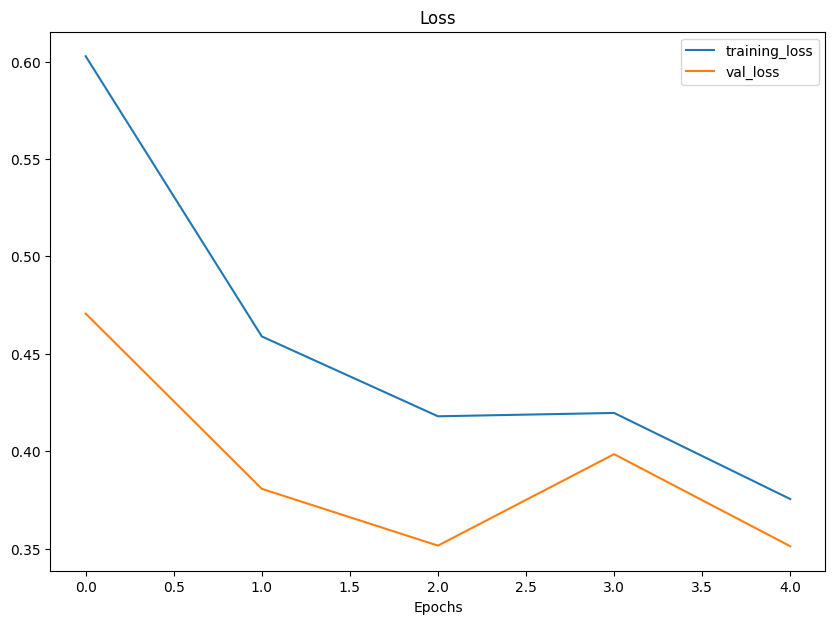

<Figure size 640x480 with 0 Axes>

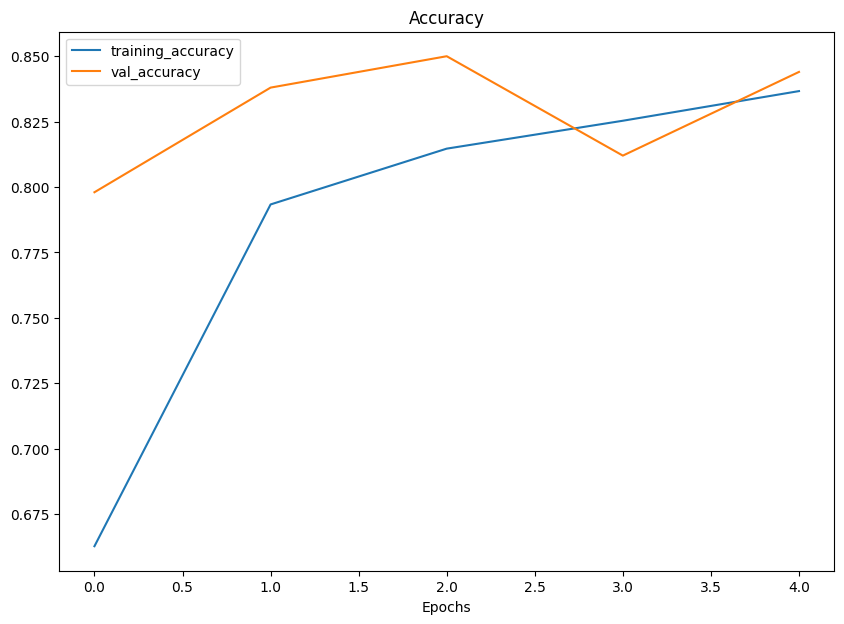

In [43]:
# Plot the curves of the model_5 results
plot_loss_curves(history_5)

## 6.2 Data Augmentation

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

🔑 **Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.**

In [44]:
# Create ImageDataGenerator Training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=(1/255.),
                                             rotation_range = 0.2, # how much do we want to rotate an image
                                             shear_range=0.2,  # how much do you want to shear an image
                                             zoom_range=0.2,   # zoom in randomly on an image
                                             width_shift_range = 0.2, # move your image on x-axis
                                             height_shift_range = 0.3, # move your image on the y-axis
                                             horizontal_flip = True)  # do you want to flip an image

# Crete ImageDataGenerator withput data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [45]:
# Import Data and Augment it from Training Directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size=32,
                                                                   class_mode = "binary",
                                                                   shuffle = False) # for demonstration only

# Create Non-Augmented Train Data Batches
print("Non-augmented trainin data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)
# Create non-augmented test data batches
print("Non-Augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size =32,
                                             class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented trainin data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


In [46]:
#  Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

Showing image number: 23


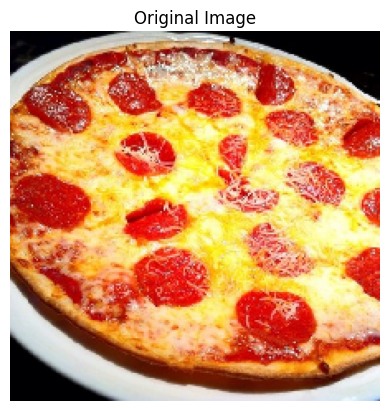

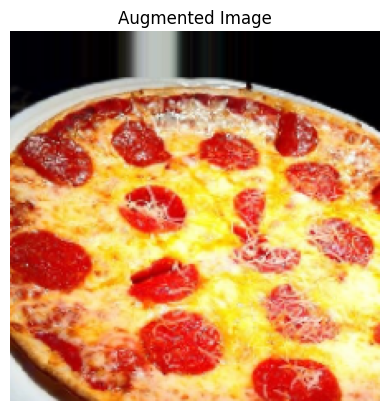

In [47]:
# Show the original and augmented image
import random
random_number = random.randint(0,32) # our batch size is 32

print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

## Retrain Model 5 on Augmented Data

In [48]:
# Recreate model_5
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])


# Compile the Model
model_6.compile(loss="binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 397ms/step - loss: 0.7765 - accuracy: 0.4780 - val_loss: 0.6863 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 19s 403ms/step - loss: 0.6963 - accuracy: 0.5040 - val_loss: 0.6857 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 19s 402ms/step - loss: 0.6942 - accuracy: 0.5460 - val_loss: 0.6614 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 19s 400ms/step - loss: 0.6513 - accuracy: 0.6307 - val_loss: 0.6906 - val_accuracy: 0.5120
Epoch 5/5
47/47 [==============================] - 19s 403ms/step - loss: 0.6621 - accuracy: 0.6207 - val_loss: 0.5482 - val_accuracy: 0.7500


**Why didn't our model get very good results on the training set to begin with?**

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set shuffle=False for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting shuffle=True on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the ImageDataGenerator instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

🔑 Note: One possible method to speed up dataset manipulation would be to look into TensorFlow's parrallel reads and buffered prefecting options.

<Figure size 640x480 with 0 Axes>

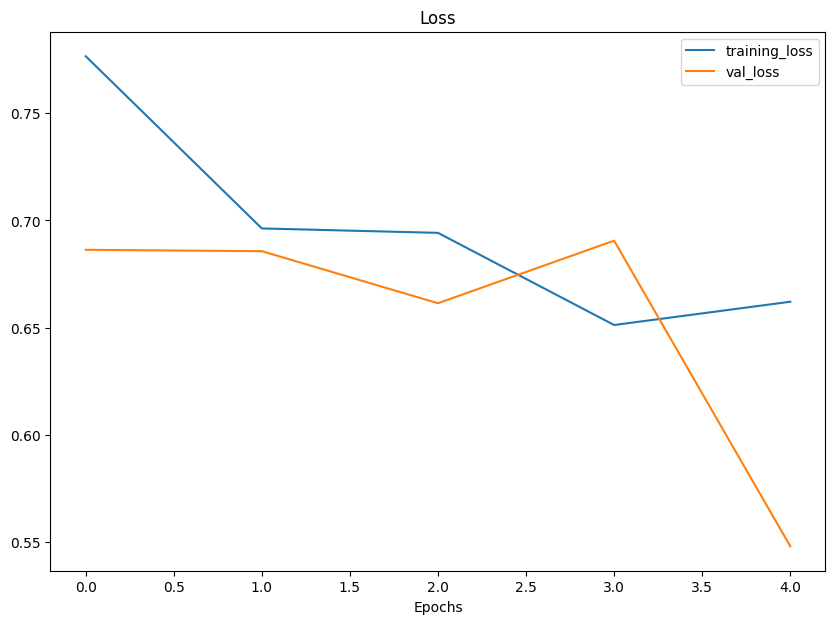

<Figure size 640x480 with 0 Axes>

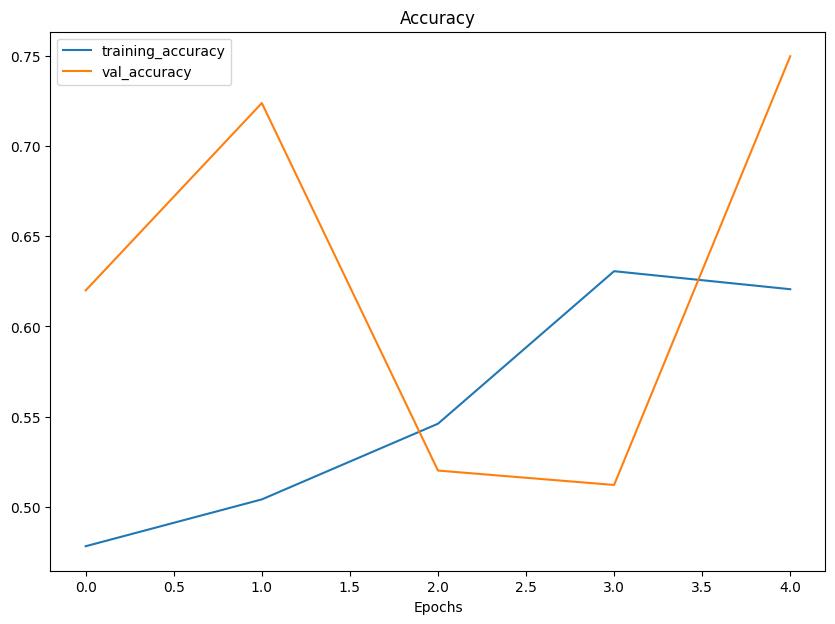

In [49]:
# Check the Model Training Curves
plot_loss_curves(history_6)

It seems our validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).
Let's see what happens when we shuffle the augmented training data.

In [50]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [51]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 396ms/step - loss: 0.6780 - accuracy: 0.5627 - val_loss: 0.6050 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 19s 400ms/step - loss: 0.6023 - accuracy: 0.6693 - val_loss: 0.4864 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 19s 401ms/step - loss: 0.5493 - accuracy: 0.7113 - val_loss: 0.4110 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 19s 404ms/step - loss: 0.5218 - accuracy: 0.7453 - val_loss: 0.4972 - val_accuracy: 0.7220
Epoch 5/5
47/47 [==============================] - 19s 402ms/step - loss: 0.5139 - accuracy: 0.7467 - val_loss: 0.3980 - val_accuracy: 0.8320


<Figure size 640x480 with 0 Axes>

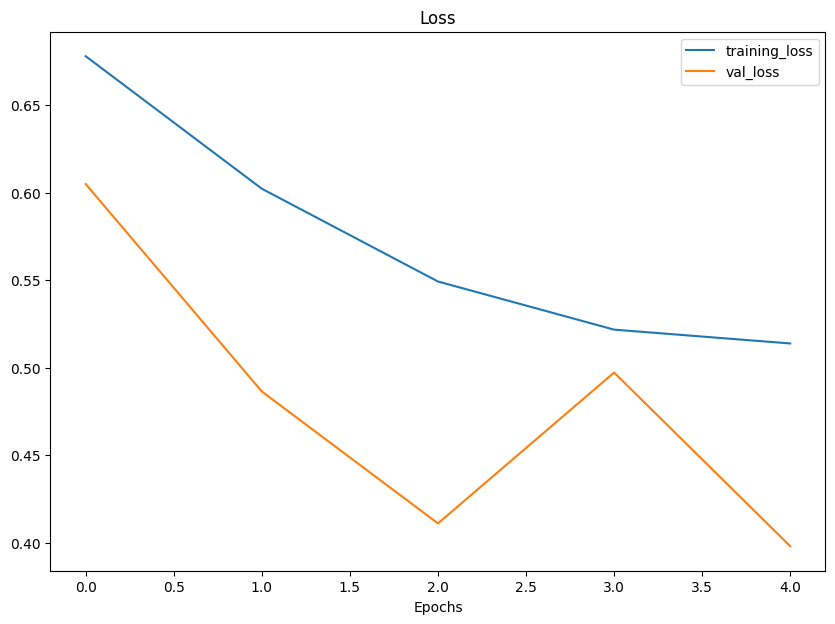

<Figure size 640x480 with 0 Axes>

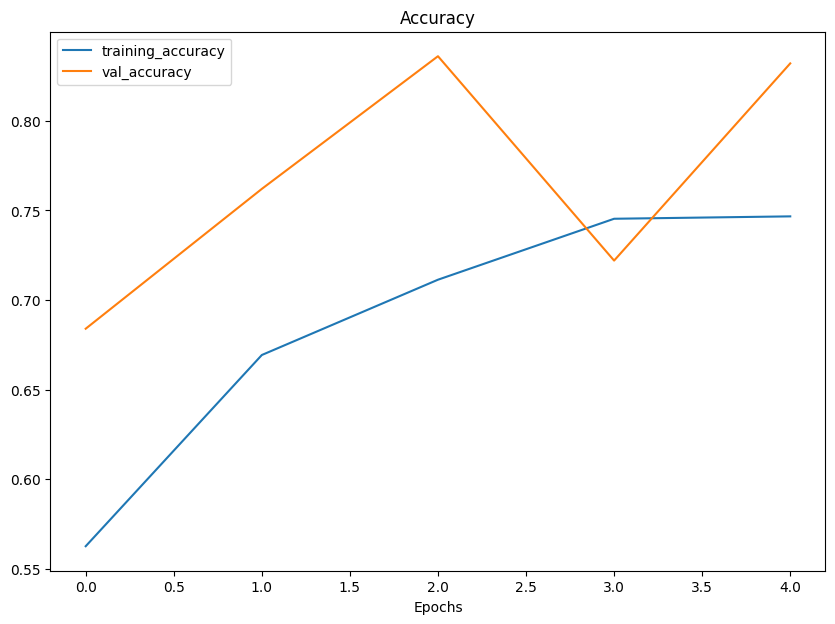

In [52]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

Notice with model_7 how the performance on the training dataset improves almost immediately compared to model_6. This is because we shuffled the training data as we passed it to the model using the parameter shuffle=True in the flow_from_directory method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing history_6 to history_7).

## 7. Repeat until Satisfied

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

- Increase the number of model layers (e.g. add more convolutional layers).
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
- Train for longer (more epochs).
- Finding an ideal learning rate.
- Get more data (give the model more opportunities to learn).
- Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as hyperparameter tuning.

Let's go back to right where we started and try our original model and see its performance on the augmented data.

In [54]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
47/47 [==============================] - 20s 396ms/step - loss: 0.6713 - accuracy: 0.5687 - val_loss: 0.6124 - val_accuracy: 0.6760
Epoch 2/50
47/47 [==============================] - 19s 404ms/step - loss: 0.6244 - accuracy: 0.6500 - val_loss: 0.5871 - val_accuracy: 0.6940
Epoch 3/50
47/47 [==============================] - 19s 404ms/step - loss: 0.5729 - accuracy: 0.7007 - val_loss: 0.4515 - val_accuracy: 0.8420
Epoch 4/50
47/47 [==============================] - 19s 402ms/step - loss: 0.5309 - accuracy: 0.7293 - val_loss: 0.5348 - val_accuracy: 0.6980
Epoch 5/50
47/47 [==============================] - 19s 402ms/step - loss: 0.4862 - accuracy: 0.7767 - val_loss: 0.3864 - val_accuracy: 0.8340
Epoch 6/50
47/47 [==============================] - 19s 404ms/step - loss: 0.4683 - accuracy: 0.7927 - val_loss: 0.3325 - val_accuracy: 0.8600
Epoch 7/50
47/47 [==============================] - 19s 401ms/step - loss: 0.4514 - accuracy: 0.7967 - val_loss: 0.3763 - val_accuracy: 0.8400

In [55]:
# check the model architechture
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

<Figure size 640x480 with 0 Axes>

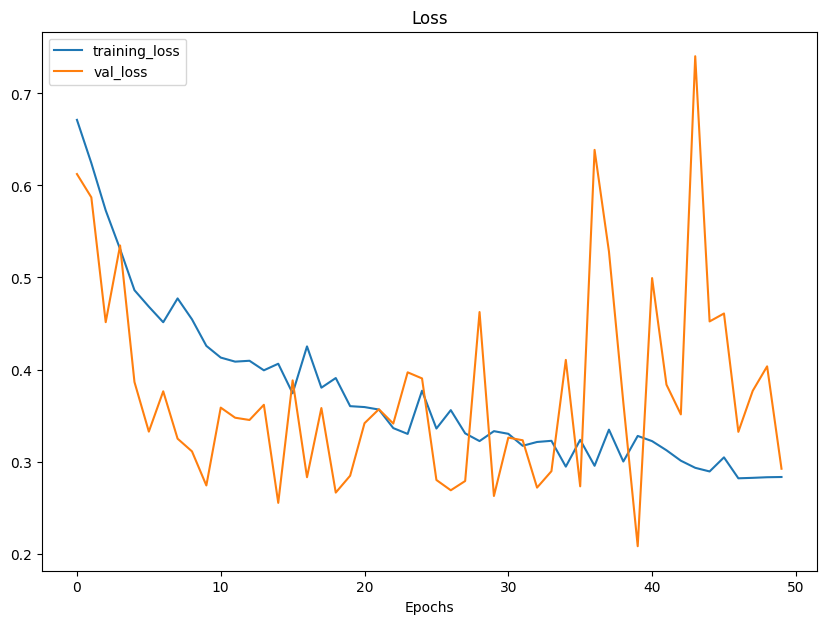

<Figure size 640x480 with 0 Axes>

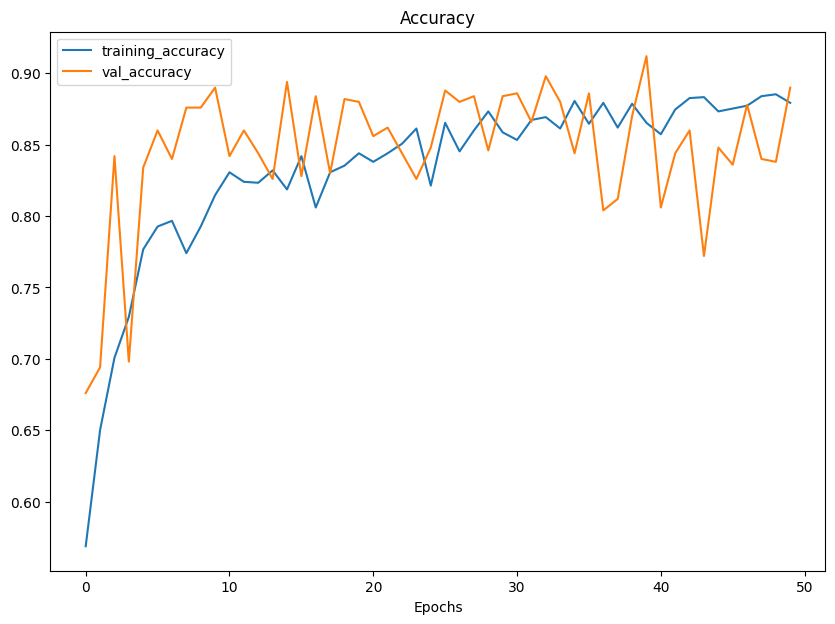

In [56]:
# Check out the our model's performance
plot_loss_curves(history_8)

### Making a Prediction with our Trained Model on our own custom data

In [57]:
print(class_names)

['pizza' 'steak']


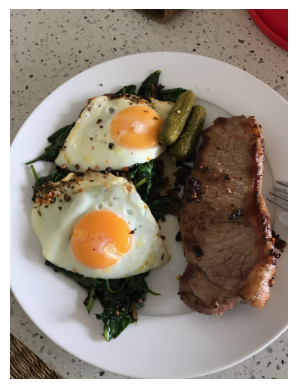

In [58]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# View our example image
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


steak = mpimg.imread("03-steak.jpeg")  # uploaded directly
plt.imshow(steak)
plt.axis(False);

In [59]:
# Check the image shape
steak.shape

(4032, 3024, 3)

In [60]:
expanded_steak = tf.expand_dims(steak, axis=0)

model_8.predict(expanded_steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 4032, 3024, 3)


**Note**: When we train a neural network and we want to make a prediction with our own custom data, it's important that our custom data is preprocessed into the same format as the data our model was trained on

In [61]:
# Create a function to import image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it into (img_shape, img_shape, color_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  #rescale the image (get values between 0 and 1)
  img = img/255
  return img

In [66]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [67]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [68]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 181ms/step


array([[0.9894202]], dtype=float32)

Ahh, the predictions come out in prediction probability form. In other words, this means how likely the image is to be one class or another.

Since we're working with a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the postive class (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the negative class (class 0).

🔑 Note: The 0.5 cutoff can be adjusted to your liking. For example, you could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change your model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when we're working with pizza 🍕 and steak 🥩...

So let's write a little function to convert predictions into their class names and then plot the target image.

In [69]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [70]:
# we can index the predicted class by rounding the pred prob
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [71]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes a prediction using model and plots the image with the predicted calss as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 113ms/step


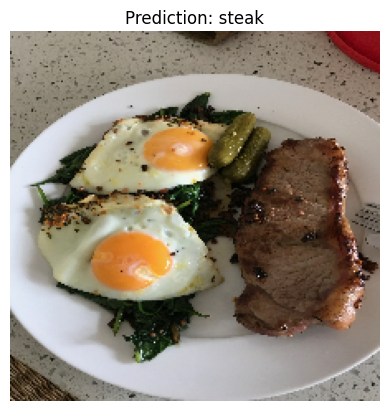

In [72]:
# Test our model on a custome image
pred_and_plot(model_7, "03-steak.jpeg")

# Multi-Class Image Classification

## 1. Become one with the data

In [73]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-07-18 16:49:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.5MB/s    in 24s     

2024-07-18 16:50:08 (20.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [74]:
import os

# walkthrough our dataset
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and len{len(filenames)} images in '{dirpath}'.")

There are 2 directories and len0 images in '10_food_classes_all_data'.
There are 10 directories and len0 images in '10_food_classes_all_data/train'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and len750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and len750 images in '10

In [75]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [76]:
# Lets ge the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (306, 512, 3)


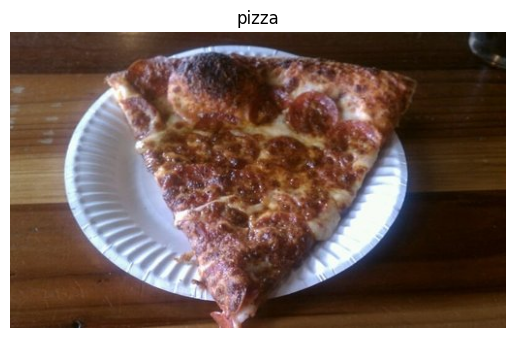

In [77]:

# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## 2. PreProcess the Data

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [79]:
## 3. Create a baseline model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


# Create our model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])


# Compile the Model
model_9.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Fit the Model

In [80]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 25s 102ms/step - loss: 2.1955 - accuracy: 0.1897 - val_loss: 2.0529 - val_accuracy: 0.2732
Epoch 2/5
235/235 [==============================] - 24s 100ms/step - loss: 1.9116 - accuracy: 0.3333 - val_loss: 1.9637 - val_accuracy: 0.3132
Epoch 3/5
235/235 [==============================] - 24s 101ms/step - loss: 1.4935 - accuracy: 0.4965 - val_loss: 2.1000 - val_accuracy: 0.2872
Epoch 4/5
235/235 [==============================] - 23s 99ms/step - loss: 0.8208 - accuracy: 0.7376 - val_loss: 2.6528 - val_accuracy: 0.2740
Epoch 5/5
235/235 [==============================] - 23s 100ms/step - loss: 0.2782 - accuracy: 0.9165 - val_loss: 4.0121 - val_accuracy: 0.2652


## 5. Evaluate the Model

In [81]:
# Evaluate on test data
model_9.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 4.0121 - accuracy: 0.2652


[4.01212215423584, 0.2651999890804291]

<Figure size 640x480 with 0 Axes>

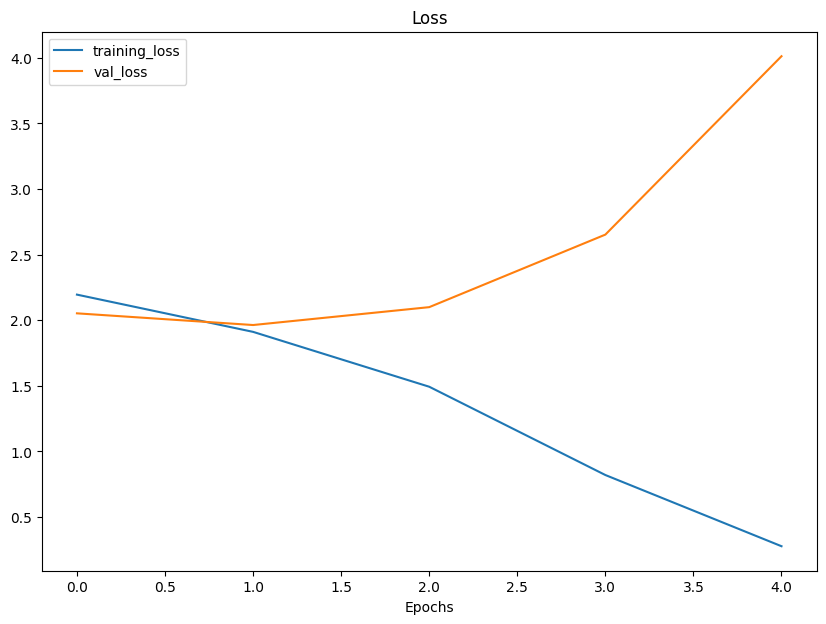

<Figure size 640x480 with 0 Axes>

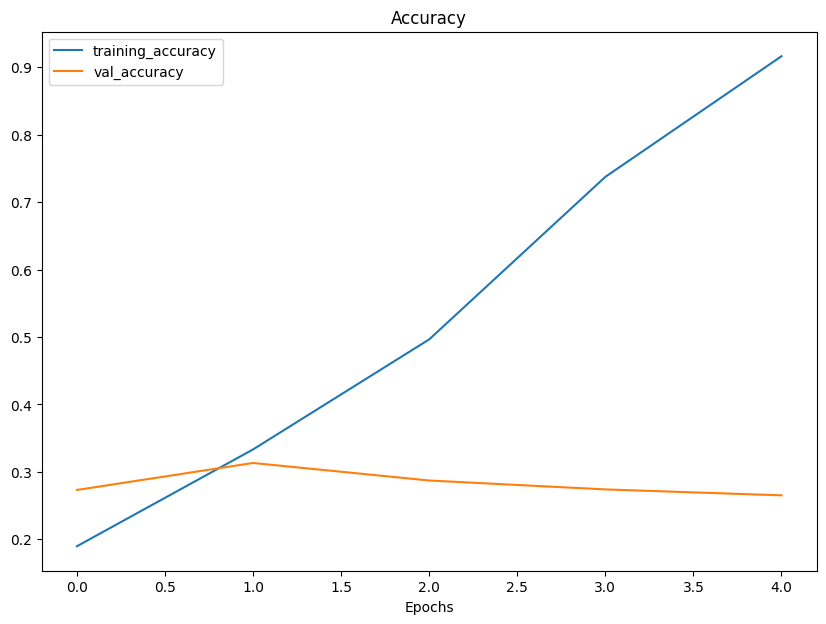

In [82]:
# Check out thee model's loss curve on the 10 classes of data
plot_loss_curves(history_9)

Looks like our model is overfitting quite a bit.

## 6. Adjust the Model Params

ue to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

- Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
🔑 Note: Preventing overfitting is also referred to as regularization.

If you've already got an existing dataset, you're probably most likely to try one or a combination of the last three above options first.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

How about we simplify our model first?

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [85]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=15,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 25s 103ms/step - loss: 2.0983 - accuracy: 0.2449 - val_loss: 1.9203 - val_accuracy: 0.3244
Epoch 2/15
235/235 [==============================] - 23s 99ms/step - loss: 1.7249 - accuracy: 0.4173 - val_loss: 1.8797 - val_accuracy: 0.3436
Epoch 3/15
235/235 [==============================] - 23s 100ms/step - loss: 1.3018 - accuracy: 0.5771 - val_loss: 1.9661 - val_accuracy: 0.3480
Epoch 4/15
235/235 [==============================] - 23s 99ms/step - loss: 0.8343 - accuracy: 0.7477 - val_loss: 2.1329 - val_accuracy: 0.3396
Epoch 5/15
235/235 [==============================] - 23s 99ms/step - loss: 0.4648 - accuracy: 0.8747 - val_loss: 2.5627 - val_accuracy: 0.3160
Epoch 6/15
235/235 [==============================] - 23s 99ms/step - loss: 0.2325 - accuracy: 0.9512 - val_loss: 3.0386 - val_accuracy: 0.3080
Epoch 7/15
235/235 [==============================] - 23s 100ms/step - loss: 0.1008 - accuracy: 0.9876 - val_loss: 3.4047 - val_accura

<Figure size 640x480 with 0 Axes>

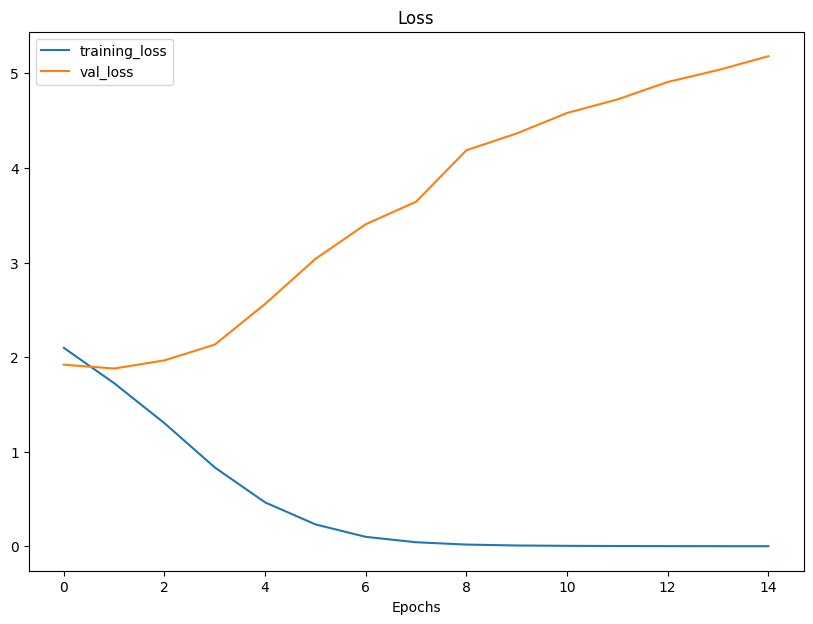

<Figure size 640x480 with 0 Axes>

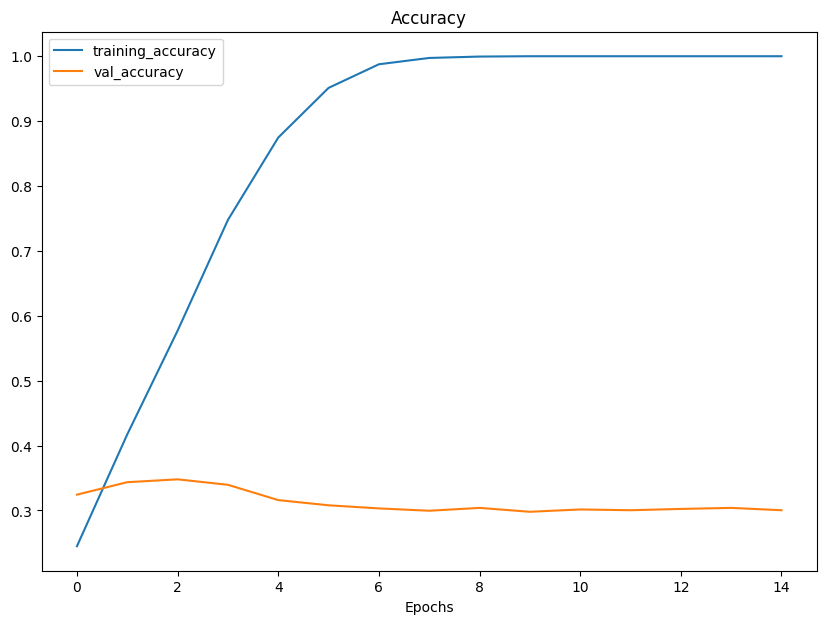

In [86]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

### Data Augmentation

In [88]:
# create augmented data
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

In [97]:
# Clone th model
model_11 = tf.keras.models.clone_model(model_10)

# compile the cloned model
model_11.compile(loss= "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Fit the Model
history_11 = model_11.fit(train_data_augmented,
                          epochs=50,
                          steps_per_epoch= len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/50
235/235 [==============================] - 94s 396ms/step - loss: 2.2732 - accuracy: 0.1631 - val_loss: 2.0614 - val_accuracy: 0.2504
Epoch 2/50
235/235 [==============================] - 94s 399ms/step - loss: 2.0914 - accuracy: 0.2551 - val_loss: 1.9103 - val_accuracy: 0.3436
Epoch 3/50
235/235 [==============================] - 94s 399ms/step - loss: 2.0271 - accuracy: 0.2881 - val_loss: 1.8583 - val_accuracy: 0.3500
Epoch 4/50
235/235 [==============================] - 93s 398ms/step - loss: 1.9775 - accuracy: 0.3113 - val_loss: 1.7905 - val_accuracy: 0.3772
Epoch 5/50
235/235 [==============================] - 93s 396ms/step - loss: 1.9414 - accuracy: 0.3229 - val_loss: 1.8185 - val_accuracy: 0.3788
Epoch 6/50
235/235 [==============================] - 94s 399ms/step - loss: 1.9270 - accuracy: 0.3339 - val_loss: 1.8055 - val_accuracy: 0.3812
Epoch 7/50
235/235 [==============================] - 94s 400ms/step - loss: 1.9044 - accuracy: 0.3440 - val_loss: 1.7437 - val_ac

You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

Note: One way to improve this time taken is to use augmentation layers directly as part of the model. For example, with tf.keras.layers.RandomFlip. You can also speed up data loading with the newer tf.keras.utils.image_dataset_from_directory image loading API (we cover this later in the course).

<Figure size 640x480 with 0 Axes>

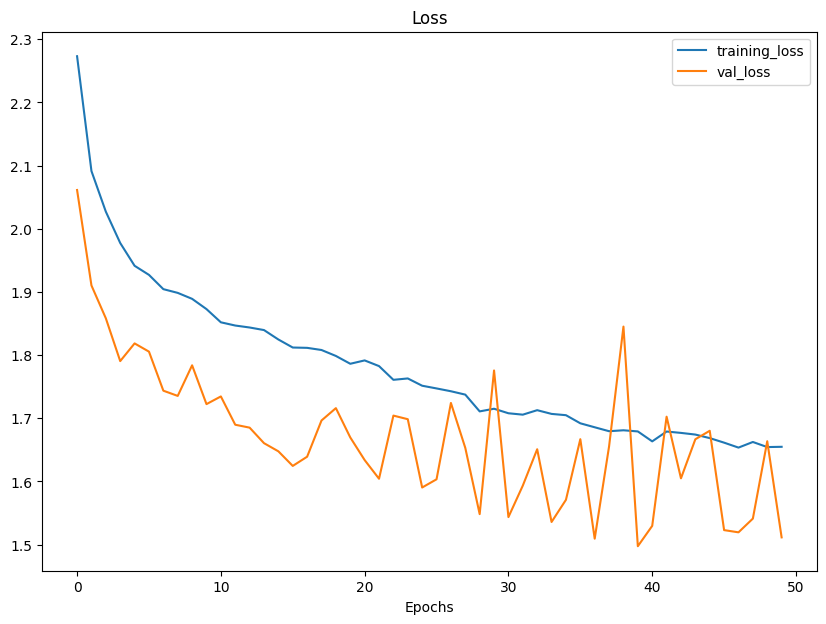

<Figure size 640x480 with 0 Axes>

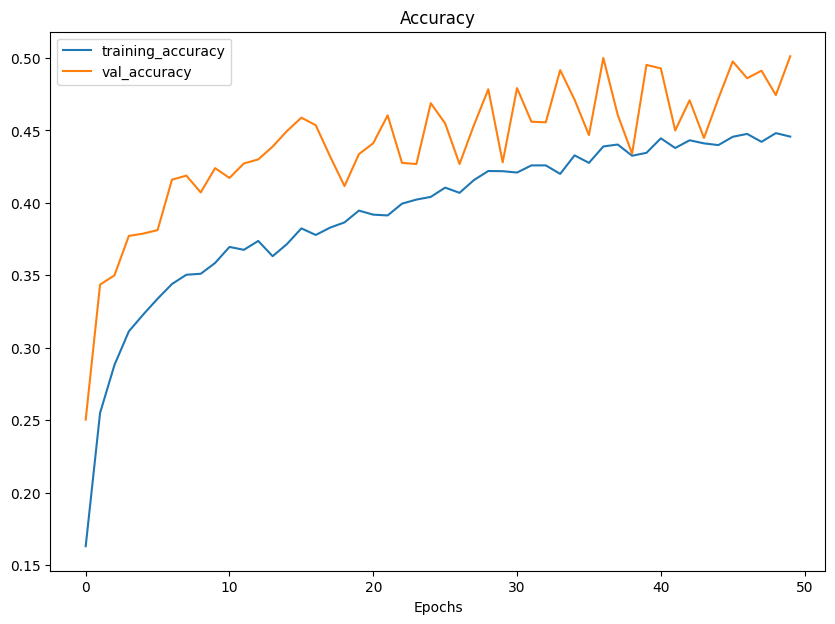

In [98]:
# check the model's performance with augmented data
plot_loss_curves(history_11)

That's looking much better, the loss curves are much closer to eachother. Although our model didn't perform as well on the augmented training set, it performed much better on the validation dataset.

It even looks like if we kept it training for longer (more epochs) the evaluation metrics might continue to improve.

## 7. Repeat Until Satisfied

We could keep going here. Restructuring our model's architecture, adding more layers, trying it out, adjusting the learning rate, trying it out, trying different methods of data augmentation, training for longer. But as you could image, this could take a fairly long time.

Good thing there's still one trick we haven't tried yet and that's **transfer learning.**

However, we'll save that for the next notebook where you'll see how rather than design our own models from scratch we leverage the patterns another model has learned for our own task.

In the meantime, let's make a prediction with our trained multi-class model.

### Making a Prediction with our Trained Model

In [ ]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# # -q is for "quiet"
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
# !wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [93]:
# # Make a prediction using model_11
# pred_and_plot(model=model_11,
#               filename="03-steak.jpeg",
#               class_names=class_names)

1/1 [==============================] - 0s 21ms/step


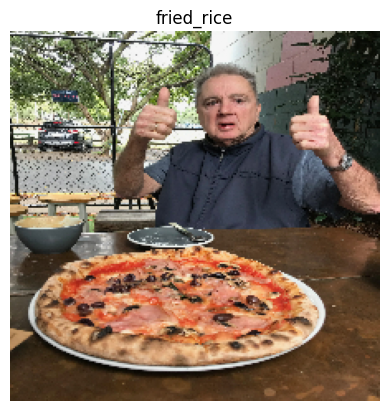

In [96]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-pizza-dad.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 21ms/step


array([[0.08672872, 0.05627522, 0.09512808, 0.20777553, 0.13431336,
        0.08994541, 0.04529649, 0.07792303, 0.1605969 , 0.04601722]],
      dtype=float32)

In [ ]:
# Find the predicted class name
class_names[pred.argmax()]

'grilled_salmon'

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 20ms/step


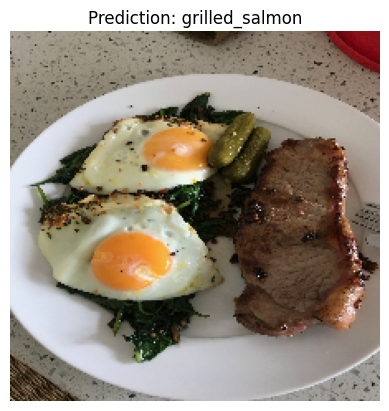

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We'll see how to improve this later on (spolier: transfer learning is going to step things up a notch).

## Saving and Loading our Model

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 1.8556 - accuracy: 0.3596


[1.8556337356567383, 0.3596000075340271]

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.8556 - accuracy: 0.3596


[1.855634331703186, 0.3596000075340271]